# Presentation of the model
## Autarky case
### Demand
In country $n$, demand consists in a representative consumer who has to choose his consumption of cereals $q_{c,n}$ and meat $q_{m,n}$ with a CES utility function, and the following problem:
$$ \max_{\left\lbrace q_{c,n}, q_{m,n} \right\rbrace} \left\lbrace U(q) = 
\Big[ q_{c,n}^{\frac{\sigma -1}{\sigma}} + q_{m,n}^{\frac{\sigma -1}{\sigma}} \Big]^{\frac{\sigma}{\sigma -1}} \right\rbrace
$$
Subject to:
$$ q_{c,n} + q_{m,n} p = y_n $$
$$ q_{c,n} \geq 0, \hspace{3mm} q_{m,n} \geq 0 $$
The price of cereals is normalized to 1, and $p$ stands for the relative price of meat on cereals.
### Supply
There are 2 types of producers: cereal producers and meat producers, with the following production functions:
$$ Q_{c, n} (L_{c, n}) = L_{c, n}.\theta_c(d_n) $$
and 
$$ Q_{m, n} (L_{m, n}; K_{m, n})= \min \left\lbrace a_m L_{m, n} ; b_m K_{m, n} \right\rbrace $$
Where $d_n$ is the distance of country $n$'s temperature compared to the optimal temperature for growing crops, and $\theta_c(d_n)$ the productivity function, decreasing with $d_n$. 
Land, $L$, is the only input used either for growing crops or raising livestock, and $K_{m, n}$ stands for the cereals used as feed into meat production. Land and cereals are perfect complements in meat producers' function.
### Equilibrium
The equilibrium must satisfy the following constraints:
$$ L_{c, n} + L_{m, n} = \overline{L}_n $$
$$ Q_{c, n} (L_{c, n}) = q_{c, n} + K_{m, n} $$
$$ Q_{m, n} (L_{c, n}; K_{m, n}) = q_{m, n} $$
\end{align}
Where $\overline{L}_n$ is the total available arable land in country $n$.
### Subsistence consumption
We check the satisfaction of subistence consumption ex-post. Denote $\underline{Q}$ the minimal quantity of calories (or any nutritional indicator) to eat for survival, and $M= \begin{pmatrix}
\mu_m \\
\mu_c
\end{pmatrix}$ the conversion matrix of kgs into calories (or any nutritional indicator). We assume $ 1 \geq \mu_m \geq \mu_c \geq 0 $\\
Subsistence consumption is satisfied if:
$$ (q_{m, n}^\ast \hspace{2mm} q_{c, n}^\ast) . M \geq \underline{Q} $$
### Notes
The equilibrium and the conditions for the satisfaction of subsistence consumption are solvable by hand. Yet, I programed both the numerical and analytical solutions, whih yield similar result with a tolerance of 1e8. The plots below are computed from the analytical solutions.

## Trade case
### Demand
We assume agents to be the same across countries, i.e. to have same CES $\sigma$.
### Production
Under trade, we assume land to be a fully immobile input, while cereals can be freely traded (we assume no trade costs). Production functions are the same as under autarky, and all countries have the same technologies $a_m$, $b_m$ and $\theta_c(.)$. However, countries may have different land endowments and different temperatures.
### Equilibrium
Under trade, the equilibrium mus satisfy the following constraint:
$$ \forall n \in \left\lbrace R, P \right\rbrace, \hspace{3mm} L_{c, n} + L_{m, n} = \overline{L}_n $$
$$ Q_{c, P} + Q_{c, R} = q_{c, P} + q_{c, R} + K_{m, P} + K_{m, R} $$
$$ Q_{m, P} + Q_{m, R} = q_{m, P} + q_{m, R} $$
$$ \text{where} \hspace{3mm} q_{i,n} = q_{i,n, n} +  q_{i,n^\ast, n} \hspace{3mm} \text{and} \hspace{3mm} K_{m,n} = K_{m,n,n} +  K_{m,n^\ast,n} $$
$$ q_{c, P, R} + K_{m, P, R} + q_{c, R, P} + K_{m, R, P} = 0 $$
$$ q_{m, P, R} + q_{m, R, P} = 0 $$
### Subsistence consumption
The conditions for subsistence consumption to be satisfied are the same as under autarky, except equilibrium quantities for cereals and meat are now derived worldwide.
### Notes
Under autarky, we analytically solved for the equilibrium by equating $ a_m L_{m, n} = b_m K_{m, n} $, which yielded land allocated to crop production as a function of net cereal consumption $ L_{c,n}(q_{c,n}) $, then meat production as a function of $q_{c,n}$ and ended up resulting with both Relative Demand and optimal levels of $q_{c,n}$ and $q_{m,n}$.

Under trade, everything gets more complicated due to the fact that the worldwide productivity of land now depends on the amount of land allocated to cereal production (because countries have different temepratures, hence different crop yields). The model is not solvable by hand, hence the need for computational methods.

However, I get stuck when I need to derive the equilibrium quantities of $q_{c,w}$ and hence $q_{m,w}$ because the function $RD-RS$ is extremely flat around 0, which makes the computation tremendously slow.

Below, I plot both the function $\theta_{c,w}(L_{c,w}$ and the function $RD-RS$.
## Endogene temperature
Finally, I make temepratures a function of meat production as the livestock sector is responsible for almost all agricultural GHG emissions. The dynamics of temeprature are modelled that way:
$$ e_t = k_1 * q_m(Temp_{t-1}) $$
$$ GHG_t = k_2 * GHG_{t-1} + e_{t} $$  
$$ Temp_t = T0 + k_3 * GHG_t $$
Where $e_t$ represents agricultural GHG emissions, where GHG have a natural dynamic depending on $k_2$, and temperature depends on the total amount of GHG emissions. 

Again, because I only manage to have results for the autarky case, I will only plot the dynamics in autarky.


# Plots and results

## Autarky
### Main results
I plot here how the results of the analytical solution evolve with the three different characteristics of countries: land endowment, temeprature, and CES.

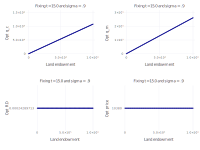

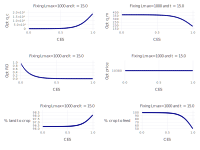

In [11]:
include("src/autarkyeq.jl")
autarkyeq.plotall()

### Subsistence consumption under autarky
Here we plot how the satisfaction of the subsistence consumption moves with the characteristics of the country. In order to make plots out of these, the function yields a 1 when the condition is satisfied, and 0 if not.
Note that this highly depends on the calibration of the parameters, that we have not done properly yet.

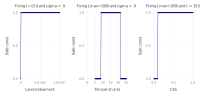

In [10]:
include("src/subsistconst.jl")
subsistconst.plotall()

### Endogene temperature
Now we plot the evolution of the results over 30 periods, for 3 different cases of CES, keeping temepratures and land endowment constant.

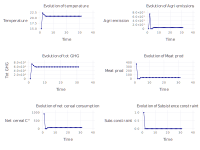

World where land endowment = 1000.0, initial temperature = 15.0, and sigma 0.1


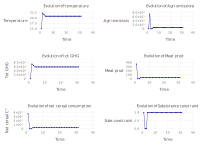

World where land endowment = 1000.0, initial temperature = 15.0, and sigma 0.5


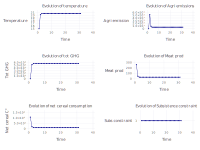

World where land endowment = 1000.0, initial temperature = 15.0, and sigma 0.9


In [12]:
include("src/dynamictemp.jl")
dynamictemp.plotall(31, 1000.0, 15.0, .1)
dynamictemp.plotall(31, 1000.0, 15.0, .5)
dynamictemp.plotall(31, 1000.0, 15.0, .9)

## Trade
As said before, I didn't manage to find results in the trade case. 
Below, I plot world productivity (world with 4 countries here), which shows kinks at each new country, sorted by decreasing thetas.
I also plot the function $RD - RS$ that is too flat around 0 so that the ```fzeros()``` function can yield a result quickly.


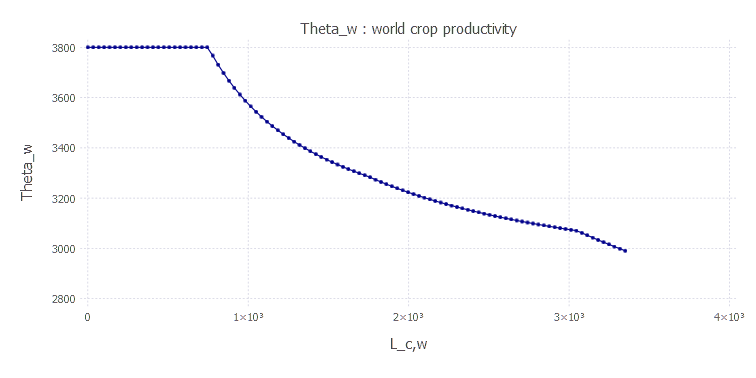

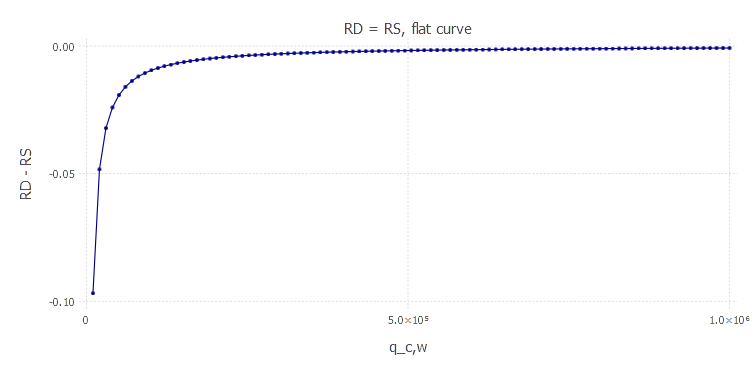

In [29]:
include("src/tradeeqdraft.jl")
Lmax = [1000.0, 1300.0, 750.0, 300.0] # Vector of land endowment per country: country 1 -> 1000 ha, country 2 -> 1300ha...
t = [13.5, 16.7, 15.0, 12.3]          # Vector of temperature per country: country 1 -> 13.5 °C, country 2 -> 16.7 °C ...
sigma = ones(4)                       # Vector of CES per country, all the same for now
tradeeqdraft.plotall(Lmax, t, sigma)